# Get population LAC

In [4]:
#!pip install h3
import json
import branca.colormap as cm
from geojson import Feature, Point, FeatureCollection
from geopandas.tools import sjoin
from h3 import geo_to_h3, h3_to_geo_boundary
from shapely.geometry import Polygon
import seaborn as sns

from utils_spatial import *

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [2]:
# Population of interest
###########################
#population_='elderly_60_plus'
population_='total_population'
#population_='youth_15_24'
#population_='women_of_reproductive_age_15_49'

LAC_concat = []
resolution = 4

for isoalpha3 in countries:
    gdf = get_hex_isoalpha(scldatalake, population_, resolution, isoalpha3)
    LAC_concat.append(gdf)

gdp_concat = gpd.GeoDataFrame(pd.concat( LAC_concat, ignore_index=True))
gdp_concat = gdp_concat[['hex_id', 'population', 'isoalpha3', 'population_type', 'geometry']]

In [ ]:
gdp_concat.to_file(f"../data/{population_}_{resolution}.geojson", driver='GeoJSON')

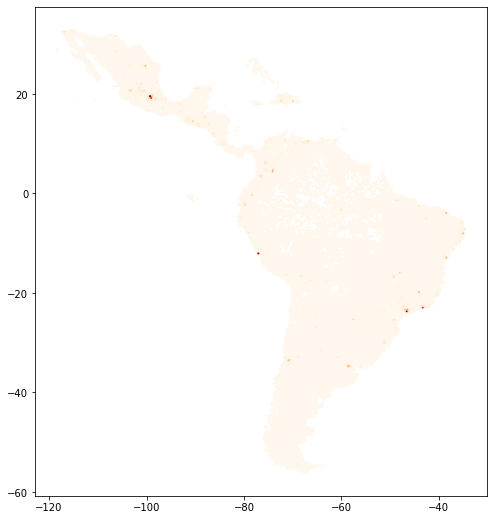

In [13]:
gdp_concat.plot( figsize=(9, 9), column='population', cmap='OrRd');